In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Exploratory Data Analysis (EDA) is an approach used in data analysis that uses various techniques to maximize insight into a dataset, and uncover underlying structures, patterns and analyze relationships between variables,
detect outliers and anomalies, test underlying assumptions, and
most important is feature selection for training Machine Learning models.

In [3]:
df = pd.read_csv('dynamic_pricing.csv')

print(df.head())

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

The given dataset consists of data related to ride sharing service costs, including  various factors that can influence the dynamic pricing model of rides. It consists of 1,000 records with the following key attributes (columns):

1.  Number_of_Riders - The number of riders participating in the ride.
2.  Number_of_Drivers - The number of drivers available at the time of booking.
3.  Location_Category - The category of the location (Urban, Suburban, Rural).
4.  Customer_Loyalty_Status - The loyalty status of the customer (e.g., Silver, Regular).
5.  Number_of_Past_Rides - The number of past rides the customer has had.
6.  Average_Ratings - The average ratings given to the drivers by the customer.
7.  Time_of_Booking - The time of the day when the booking was made.
8.  Vehicle_Type - The type of vehicle booked for the ride.
9.  Expected_Ride_Duration - The expected duration of the ride in minutes.
10. Historical_Cost_of_Ride - The cost of the ride, which serves as the target variable for predictive modeling.

In [10]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
  df

In [11]:
df.head(10)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
5,59,35,Urban,Silver,83,3.51,Night,Economy,128,339.955361
6,93,43,Suburban,Regular,44,4.41,Afternoon,Premium,16,104.061541
7,62,39,Rural,Gold,83,3.59,Afternoon,Premium,47,235.811864
8,79,14,Rural,Silver,71,3.74,Evening,Economy,128,501.412517
9,42,6,Rural,Silver,21,3.85,Night,Premium,128,398.993365


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [18]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [13]:
# checking for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

missing_values_report = pd.DataFrame({'Missing Values': missing_values, 'Data Type': data_types})
print(missing_values_report)

                         Missing Values Data Type
Number_of_Riders                      0     int64
Number_of_Drivers                     0     int64
Location_Category                     0    object
Customer_Loyalty_Status               0    object
Number_of_Past_Rides                  0     int64
Average_Ratings                       0   float64
Time_of_Booking                       0    object
Vehicle_Type                          0    object
Expected_Ride_Duration                0     int64
Historical_Cost_of_Ride               0   float64


The dataset does not contain any missing values, and the data types appears to be appropriate for each respective feature.



---



# **UNIVARIATE ANALYSIS**

Univariate Analysis is the statistical examination of one variable at a time.

It helps in understanding the distribution, central tendency, dispersion, and patterns of a single feature.

This is the first step in EDA, allowing us to analyze individual attributes before exploring relationships between multiple variables.

1. detects Outliers & Anomalies
2. identifies Data Distribution (Normal, Skewed, etc)
3. helps in Feature Engineering
4. helps in Data Cleaning (Handling missing values)

In [22]:
# numerical and categorical columns
numerical_cols = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
                  'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']


categorical_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

In [24]:
# Measures of Dispersion

dispersion_measures = pd.DataFrame({
    'Variance' : df[numerical_cols].var(),
    'Standard Deviation': df[numerical_cols].std(),
    'Range': df[numerical_cols].max() - df[numerical_cols].min(),
    'IQR': df[numerical_cols].quantile(0.75) - df[numerical_cols].quantile(0.25)
})

dispersion_measures

,Variance,Standard Deviation,Range,IQR
Number_of_Riders,561.761377,23.701506,80.000000,41.000000
Number_of_Drivers,363.601826,19.068346,84.000000,27.000000
Number_of_Past_Rides,859.297336,29.313774,100.000000,50.000000
Average_Ratings,0.189905,0.435781,1.500000,0.762500
Expected_Ride_Duration,2417.241497,49.165450,170.000000,83.250000
Historical_Cost_of_Ride,35028.400030,187.158756,810.122969,289.132302


1. Variance - measures spread of data points.

2. Standard Deviation - square root of variance.

3. Range - difference between max and min values.

4. Interquartile Range - spread of middle 50% of data.

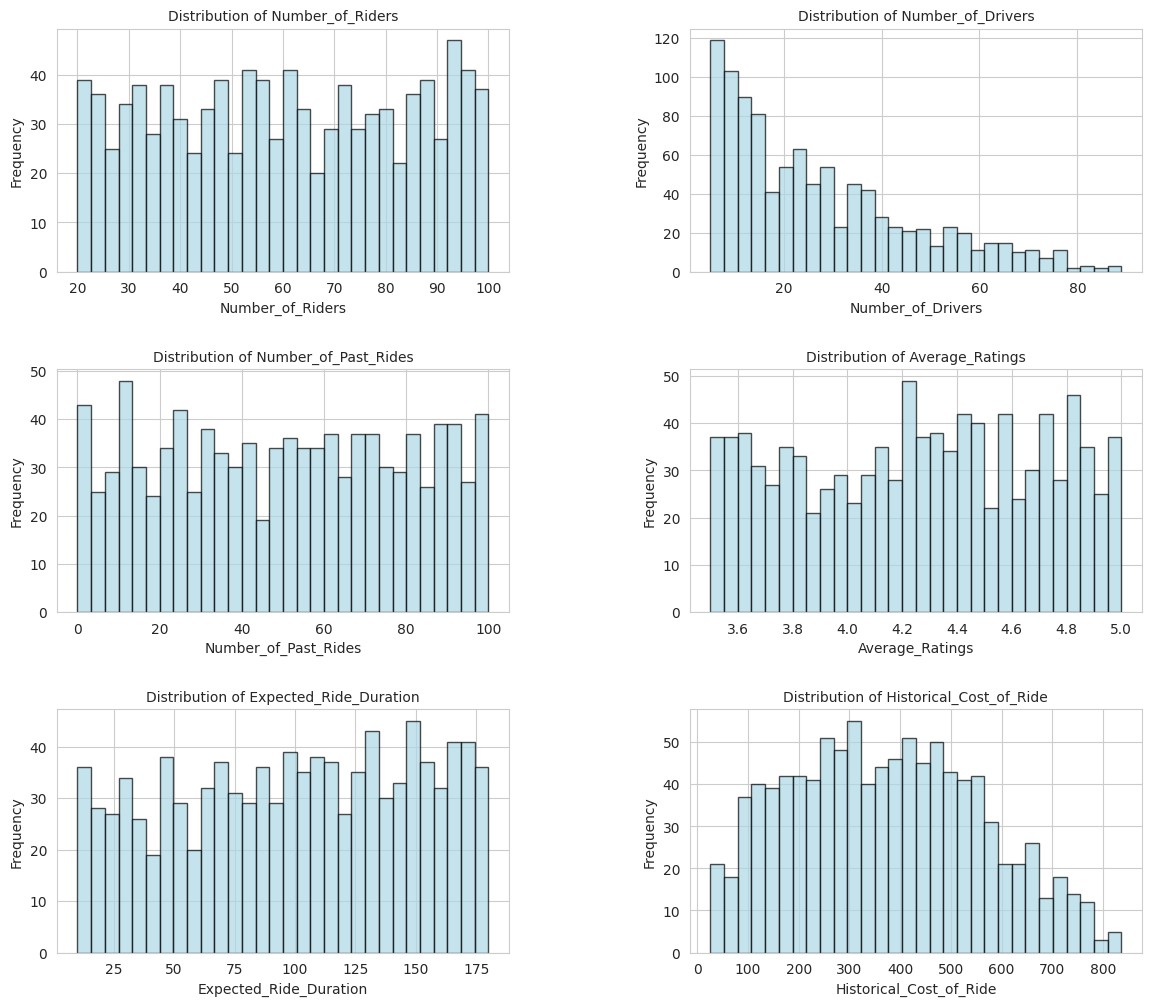

In [32]:
# distribution analysis of numerical columns using matplotlib

sns.set_style('whitegrid')

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(numerical_cols):
    ax = axes[i // 2, i % 2]
    ax.hist(df[col], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}', fontsize=10)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.show()

In [41]:
# mean, median, and mode for numerical columns

def describe_numerical_columns(df, numerical_cols):
    stats = {}
    for col in numerical_cols:
        stats[col] = {
            'mean': df[col].mean(),
            'median': df[col].median(),
            'mode': df[col].mode()[0]
        }
    return pd.DataFrame(stats).T

numerical_stats_df = describe_numerical_columns(df, numerical_cols)
numerical_stats_df

,mean,median,mode
Number_of_Riders,60.372000,60.000000,100.000000
Number_of_Drivers,27.076000,22.000000,7.000000
Number_of_Past_Rides,50.031000,51.000000,88.000000
Average_Ratings,4.257220,4.270000,4.200000
Expected_Ride_Duration,99.588000,102.000000,45.000000
Historical_Cost_of_Ride,372.502623,362.019426,25.993449


The descriptive statistics and distributions of the numerical features(numerical_columns) provide the following insights:

1. Number_of_Riders - distribution is fairly uniform, with values ranging from 20 to 100 riders. It suggests a wide variation in the number of riders per ride.


2. Number_of_Drivers - it also shows a wide range, but it is skewed towards right, indicating that there are less drivers available compared to riders.


3. Number_of_Past_Rides - distribution of past rides is even, it is slightly skewed towards lower values. it shows variability in customer experience with the service.


4. Average_Ratings - ratings are normally distributed, with a mean around 4.26, showing a positive feedback from customers, minimum rating is 3.5 and maximum raiting is 5


5. Expected_Ride_Duration - expected ride duration has a major variance/change  from 10 to 180 minutes, with a mean aroung 99.59 minutes and the distribution is uniform.


6. Historical_Cost_of_Ride - the cost of rides varies widely, from about 26 to 836 units, with mean around 372.5 units. The distribution is skewed toward right, showing that most rides cost less than the mean, but there are some more expensive rides.

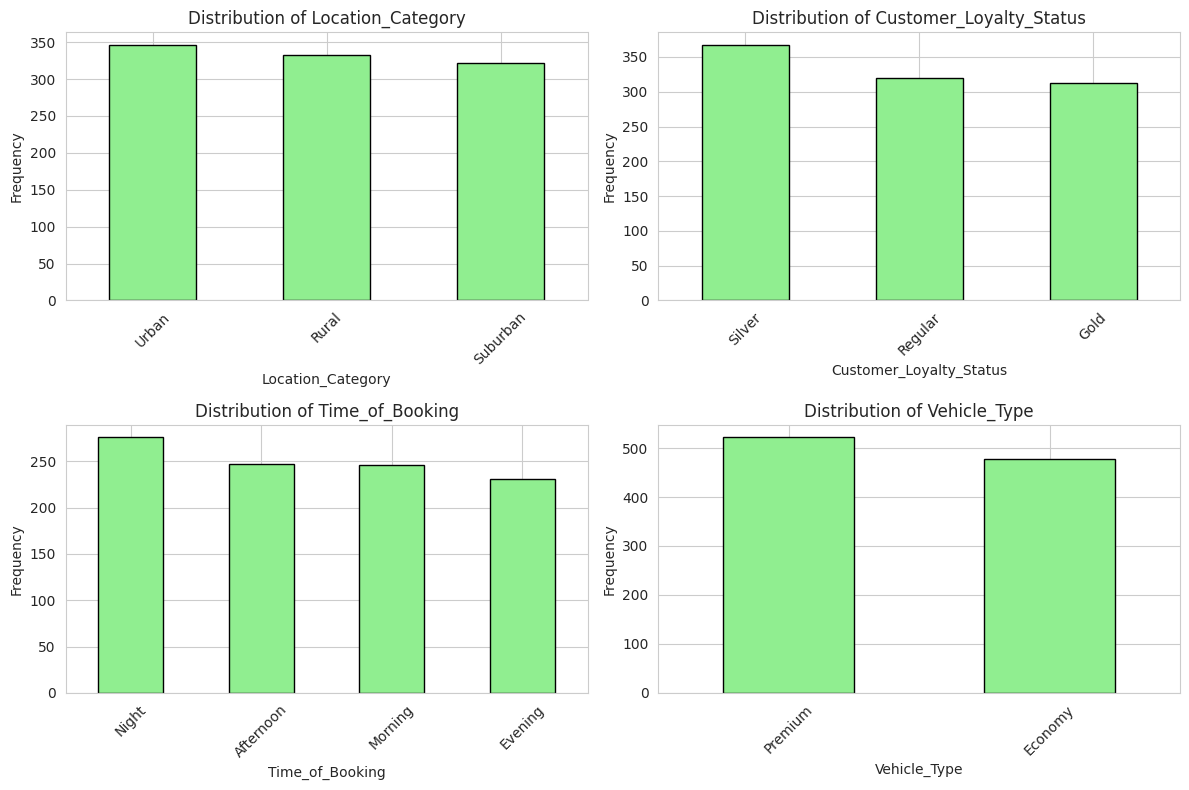

In [48]:
# distribution analysis of categorical columns using matplotlib

plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    df[col].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


1. Location_Category - distribution shows a variation, with Urban being most common, followed by Suburban and Rural categories. it suggests that the location category can impact the cost of rides, it is beacausr due to differences in demand and availability.


2. Customer_Loyalty_Status - varying levels of loyalty status among customers, with categories like Silver, Regular, Gold, the distribution shows a mix of new and loyal customers, which may influence ride costs through loyalty discounts or any kind of premium pricing.


3. Time_of_Booking - time of booking also varies, during Night, Evening, Afternoon, Morning, this feature can influence ride costs due to varying demand at different times of the day.


4. Vehicle_Type - different vehicle types, like Premium and Economy, the type of vehicle chosen for the ride will likely influence the cost directly, because premium vehicles cost more  and expensive than economy type of vehicle.



---



---



# **BIVARIATE ANALYSIS**

Bivariate analysis is a statistical technique that examines the relationship between two variables. It helps in understanding how one variable changes in relation to another and it is a crucial step in Exploratory Data Analysis in order to identify trends, dependencies, and patterns in data.



the target variable is Historical_Cost_of_Ride, so we find correlation between target variable (Historical_Cost_of_Ride) and other features.

This analysis will help us identify which features are most important and  guiding our feature selection process for predictive modelling.

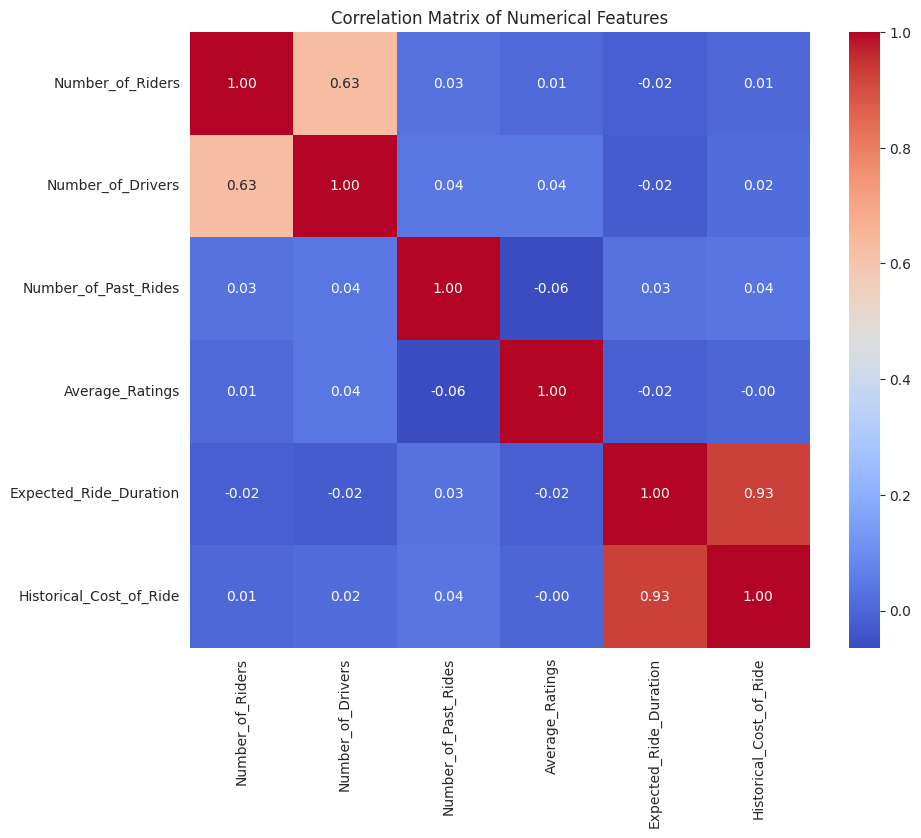



Historical_Cost_of_Ride    1.000000
Expected_Ride_Duration     0.927547
Number_of_Past_Rides       0.035859
Number_of_Drivers          0.017082
Number_of_Riders           0.005826
Average_Ratings           -0.001063
Name: Historical_Cost_of_Ride, dtype: float64


In [52]:
# correlation between the target variable and numerical features
correlation_matrix = df[numerical_cols].corr()

# plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print('\n')
print(correlation_matrix['Historical_Cost_of_Ride'].sort_values(ascending=False))

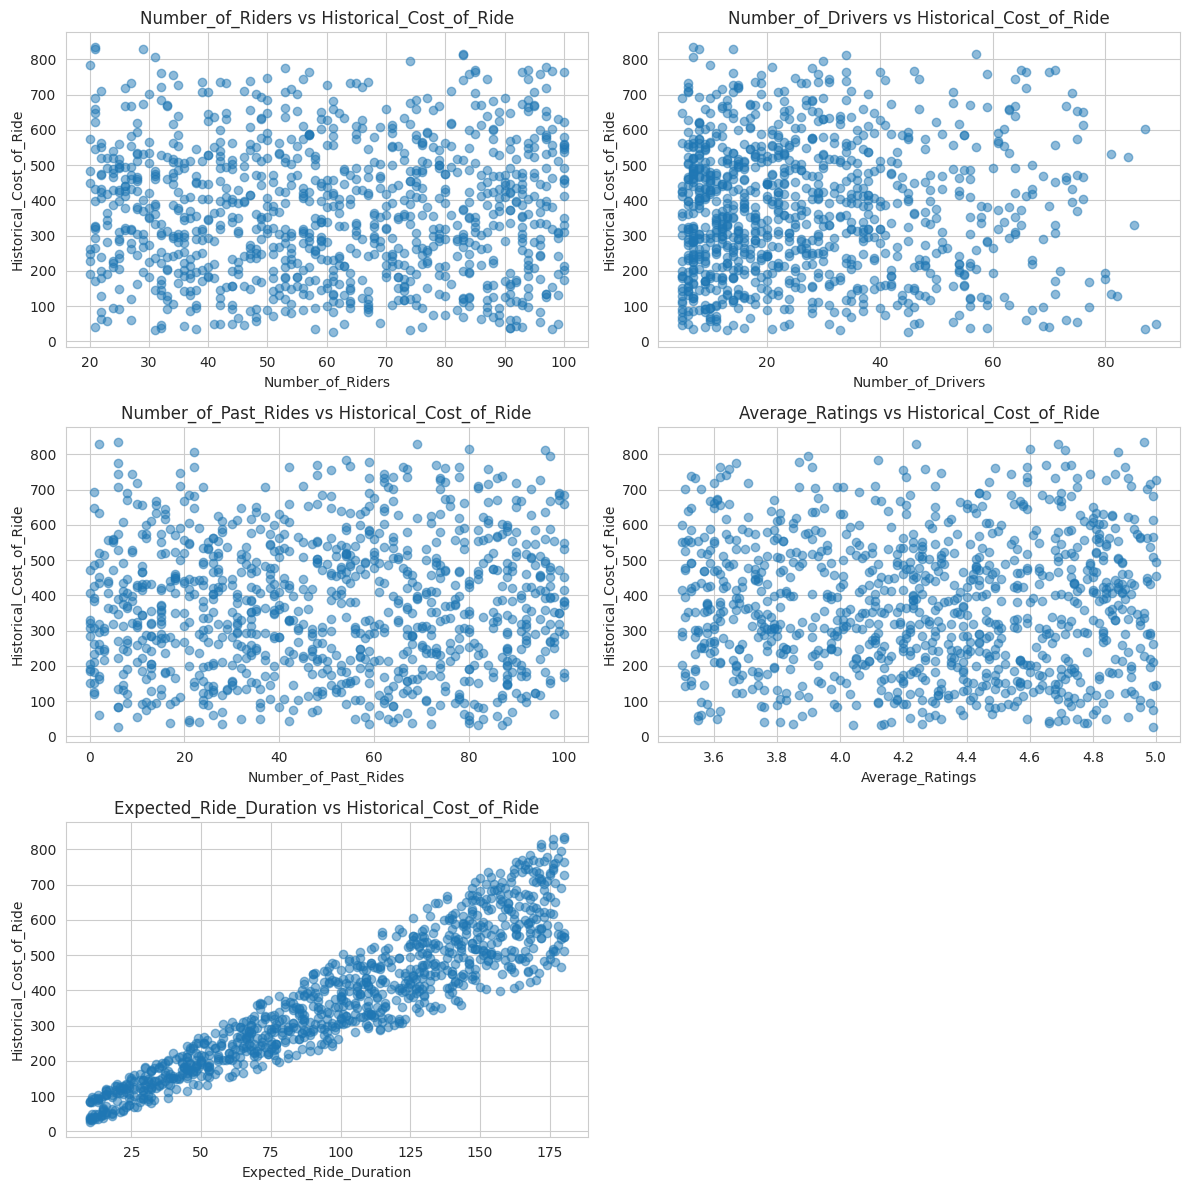

In [59]:
num_plots = len(numerical_cols) - 1  # removing target variable
n_cols = 2
n_rows = (num_plots + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:-1]):
    axes[i].scatter(df[col], df['Historical_Cost_of_Ride'], alpha=0.5)
    axes[i].set_title(f'{col} vs Historical_Cost_of_Ride')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Historical_Cost_of_Ride')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The scatter plots of numerical features against the Historical_Cost_of_Ride reveal several insights:


1.  Number_of_Riders - no clear linear relationship between the number of riders and the cost of the ride. distribution of points is quite scattered, showing that the number of riders may influence the cost of the ride,
it is not a straightforward linear relationship.


2. Number_of_Drivers - similar to number of riders, the number of drivers available does not show a clear linear relationship with the cost of ride, it indicates that driver availability may affect pricing dynamics of ride cost,
it does not do so in direct manner.


3. Number_of_Past_Rides - no linear relationship between the number of past rides a customer has had and the cost of their rides. it suggests that customer loyalty, as measured by the number of past rides, does not directly influence the cost of rides linearly.


4. Average_Ratings - scatter plot does not have a strong linear relationship between average ratings and cost of ride, but we may have expected highly-rated drivers or customers to be associated with higher costs, but the data does not support this.

5. Expected_Ride_Duration - seems to be a noticeable linear relationship,
 with a increasing trend indicating that longer expected ride durations are having higher costs, It does make sense, as ride duration increases the cost of ride also increases.

from these observations, Expected_Ride_Duration stands out as a numerical feature with a linear relationship to the Historical_Cost_of_Ride.
The other numerical features do not show clear linear relationships with the ride cost, but they may still contribute to Historical_Cost_of_Ride in combination with other features or maybe through non linear relationships.



---



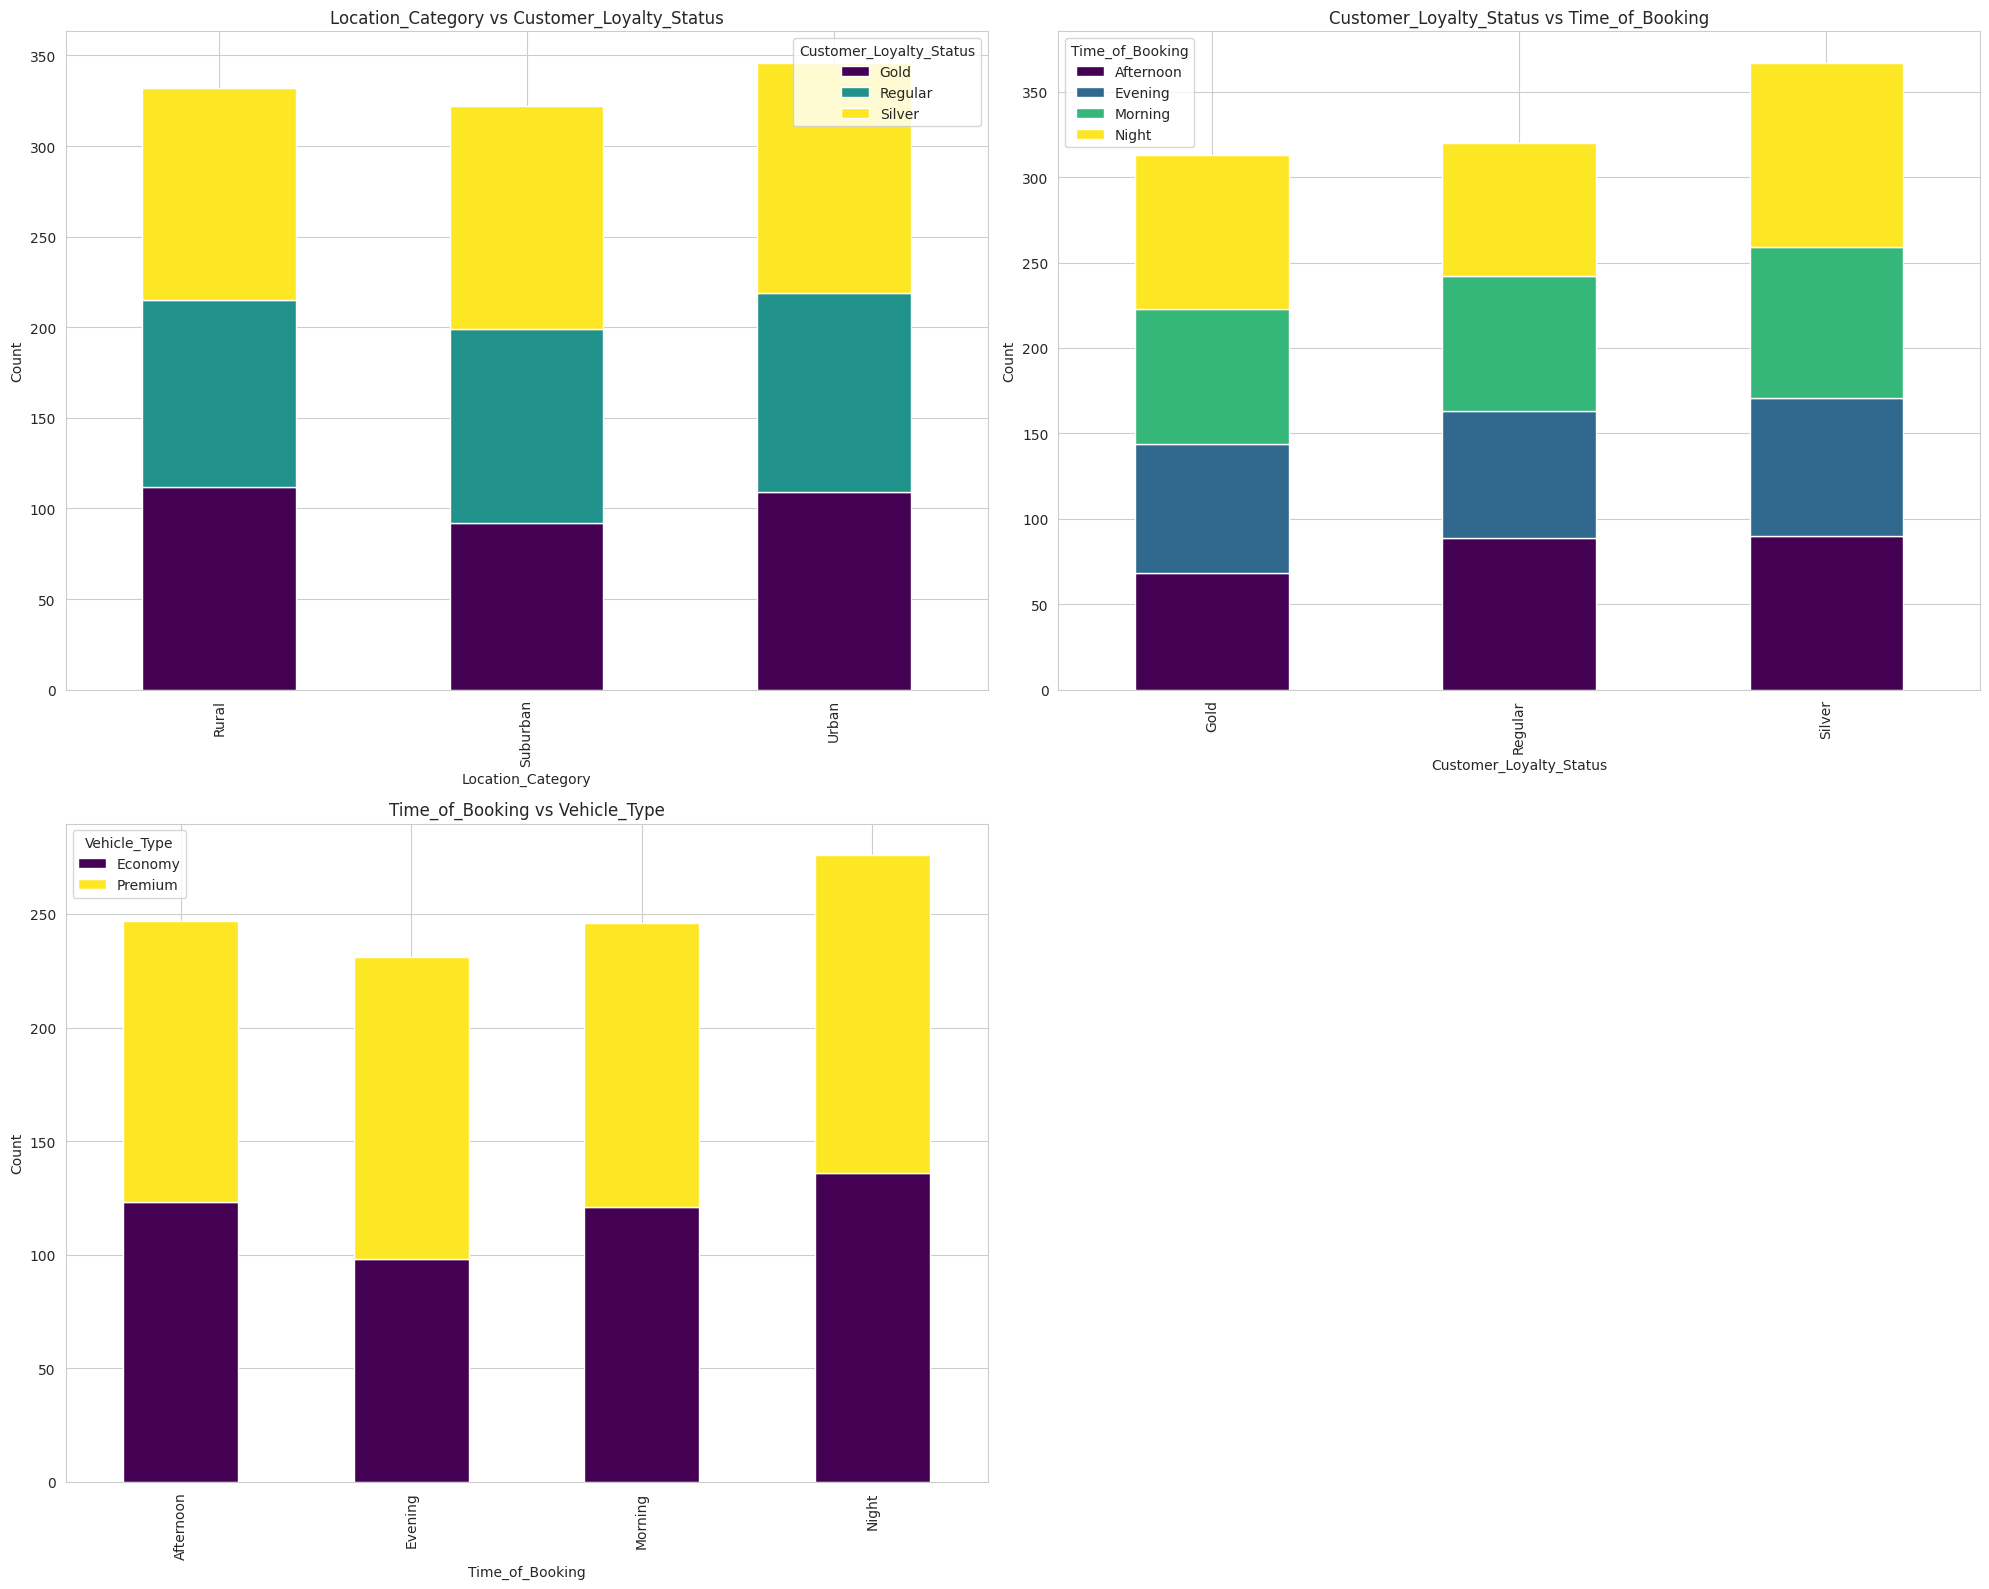

In [66]:
# Categorical vs. Categorical analysis,

categorical_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']


num_plots = len(categorical_cols)
n_cols = 2
n_rows = (num_plots + 1) // n_cols


fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 8))
axes = axes.flatten()


# stacked bar charts
for i in range(num_plots - 1):
    col1, col2 = categorical_cols[i], categorical_cols[i + 1]
    crosstab = pd.crosstab(df[col1], df[col2])

    crosstab.plot(kind='bar', stacked=True, ax=axes[i], colormap = 'viridis')
    axes[i].set_title(f"{col1} vs {col2}")
    axes[i].set_xlabel(col1)
    axes[i].set_ylabel('Count')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

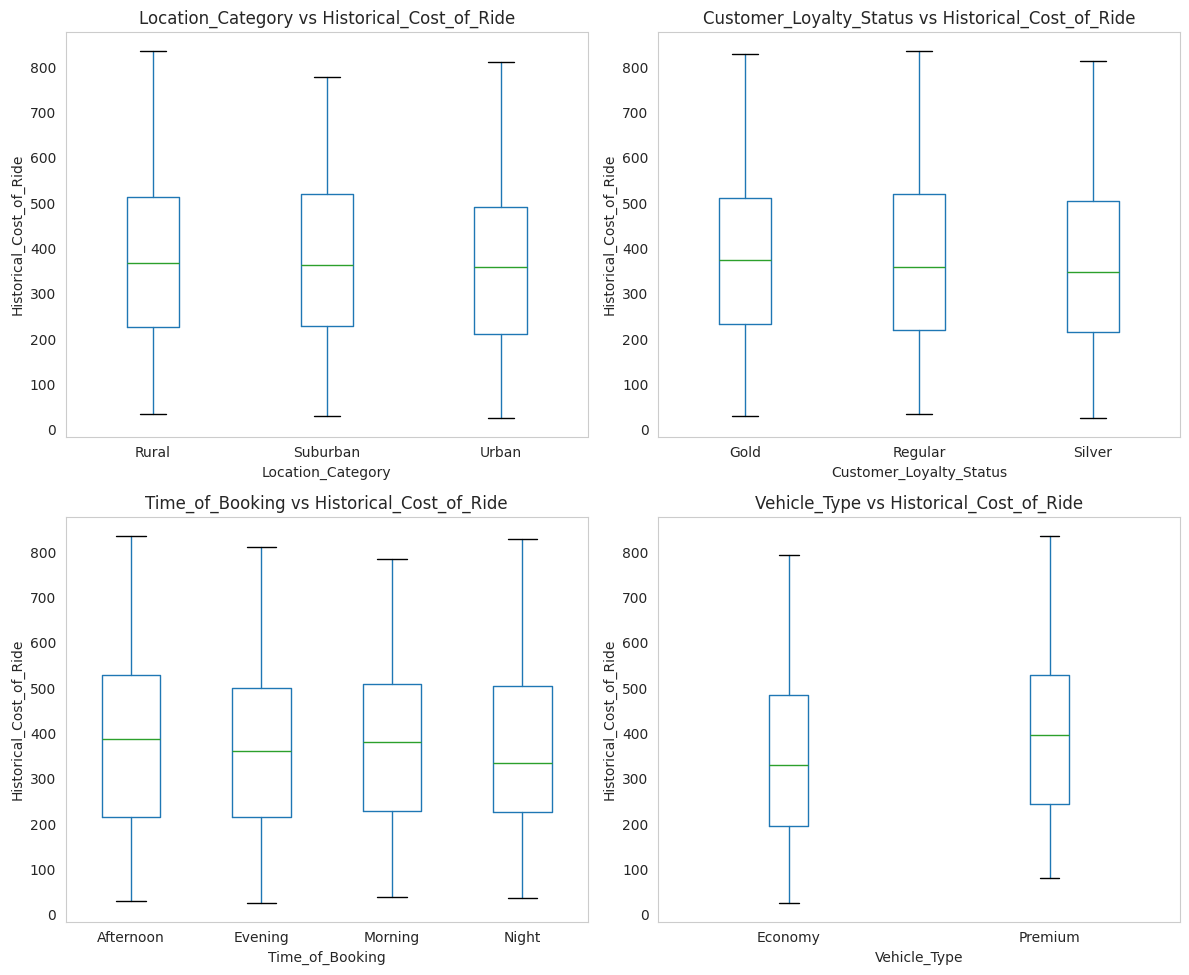

In [71]:
# categorical features Vs Historical_Cost_of_Ride, we use box plots with Matplotlib.

categorical_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    df.boxplot(column='Historical_Cost_of_Ride', by=col, ax=axes[i], grid=False)
    axes[i].set_title(f'{col} vs Historical_Cost_of_Ride')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Historical_Cost_of_Ride')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('')
plt.tight_layout()
plt.show()

box plots reveal how the Historical_Cost_of_Ride varies across different categories for each categorical feature :

1. Location_Category - cost of ride change significantly by location category, with Urban locations showing a wider range and higher median costs compared to Suburban and Rural areas. it shows that location plays a key role in determining ride costs, it is because differences in demand, availability, and operational costs in differnet areas.


2. Customer_Loyalty_Status - we can notice differences in ride costs based on the loyalty status of the customer, but the median costs for different statuses seems to be close, the variability in costs shows that loyalty status can influence pricing, it may be through loyalty discounts, perks for high status customers.


3. Time_of_Booking - time of booking seems to have impact on cost of ride , during certain times of day showing different cost distributions.
it explains demand variations throughout the day, high demad situations like peak times, festivals have higher prices.


4. Vehicle_Type - type of vehicle has a major impact on the cost of rides. Premium vehicles generally have higher costs compared to Economy vehicles, showing that vehicle type is also a critical factor in pricing.




---



**Insights from EDA for Feature Selection**

Based on the EDA, the following features have been identified as potentially important for predicting cost of a ride ::

1. Expected_Ride_Duration - shows a clear relationship with cost of a ride.
2. Location_Category - shows major variance in costs by various locations.
3. Customer_Loyalty_Status - variability in costs shows an impact on cost of a ride.
4. Time_of_Booking - variations in costs indicate an influence of demand at different times throughout the day, it can also change based on seasons also.
5. Vehicle_Type - directly influences cost with of choosing premium or economy vehicle types.

The other numerical features like

1. Number_of_Riders,
2. Number_of_Drivers,
3. Number_of_Past_Rides,
4. Average_Ratings

do not show strong linear relationships with the target variable but can still be useful, when combined with other features or through engineered features that capture non linear relationships.



---

